<a href="https://colab.research.google.com/github/RayhanPradana/PCVK_Rayhan-Pradana/blob/main/PCVK_Modul_3_Rayhan_Pradana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 90


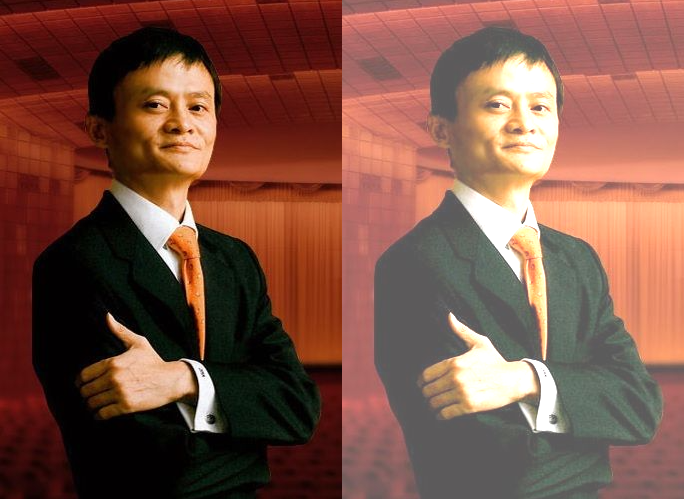

In [6]:
print(' Mengubah tingkat kecerahan citra(Brightness) ')
print('----------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, bukan angka')

original = cv.imread('/content/drive/MyDrive/Bahan PCVK/man.png')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


Mengubah citra menjadi efek negatif
-----------------------------------


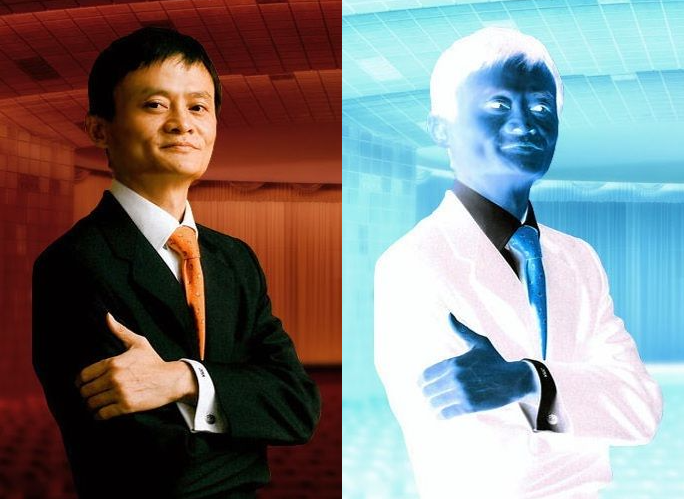

In [7]:
print('Mengubah citra menjadi efek negatif')
print('-----------------------------------')

original = cv.imread('/content/drive/MyDrive/Bahan PCVK/man.png')

negative_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      negative_image[y,x,c] = 255 - original[y,x,c]

final_frame = cv.hconcat((original, negative_image))
cv2_imshow(final_frame)


Mengubah tingkat kecerahan dan kontras citra
------------------------------------------
Masukkan nilai kecerahan (Brightness): 50
Masukkan nilai kontras (Contrast): 2


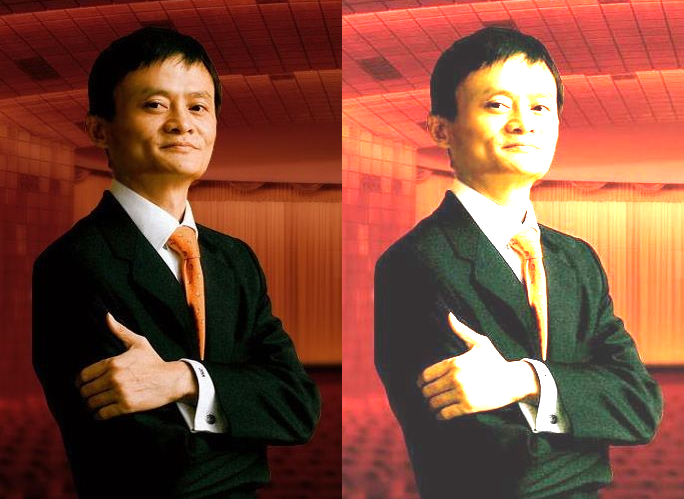

In [8]:
print('Mengubah tingkat kecerahan dan kontras citra')
print('------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan (Brightness): '))
  contrast = float(input('Masukkan nilai kontras (Contrast): '))
except ValueError:
  print('Error, input harus berupa angka')

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/Bahan PCVK/man.png')

# Membuat citra yang dimodifikasi
modified_image = np.zeros(original.shape, original.dtype)

# Mengaplikasikan brightness dan kontras
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      # Rumus kontras dan kecerahan: pixel_value = contrast * original_value + brightness
      modified_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

# Menampilkan citra asli dan citra yang telah dimodifikasi berdampingan
final_frame = cv.hconcat((original, modified_image))
cv2_imshow(final_frame)


Mengubah tingkat kecerahan citra dengan transformasi logaritmik
---------------------------------------------------------------
Masukkan nilai kecerahan (Brightness): 50


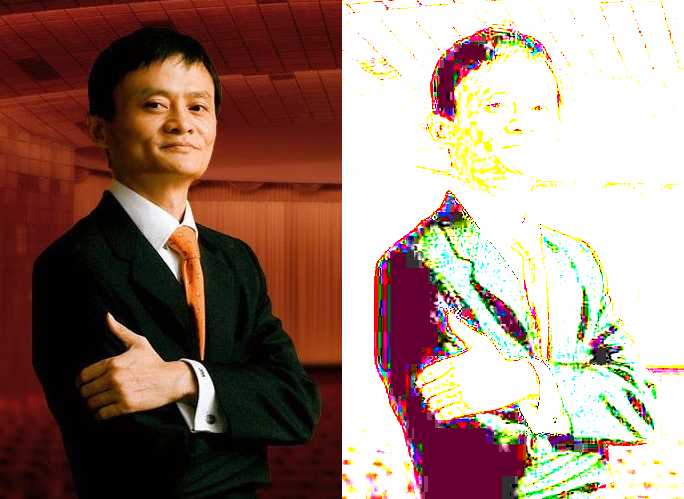

In [9]:
print('Mengubah tingkat kecerahan citra dengan transformasi logaritmik')
print('---------------------------------------------------------------')

# Input untuk nilai brightness
try:
  brightness = float(input('Masukkan nilai kecerahan (Brightness): '))
except ValueError:
  print('Error, input harus berupa angka')

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/Bahan PCVK/man.png')

# Normalisasi citra dengan rentang nilai [0, 1]
normalized_image = original / 255.0

# Transformasi logaritmik: output = c * log(1 + input)
# Biasanya nilai c diambil 1 jika ingin kecerahan seragam, namun bisa dikali brightness untuk efek lebih besar
c = brightness

# Menerapkan transformasi logaritmik
log_image = c * np.log1p(normalized_image)

# Mengembalikan citra ke rentang [0, 255] dan mengkonversinya kembali ke tipe uint8
log_image = np.uint8(np.clip(log_image * 255, 0, 255))

# Menampilkan citra asli dan citra hasil transformasi log berdampingan
final_frame = cv.hconcat((original, log_image))
cv2_imshow(final_frame)


Mengubah citra menjadi grayscale menggunakan metode averaging
--------------------------------------------------------------


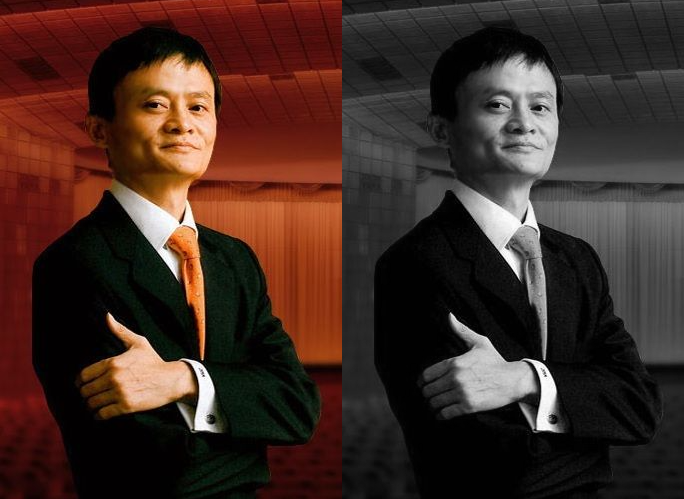

In [10]:
print('Mengubah citra menjadi grayscale menggunakan metode averaging')
print('--------------------------------------------------------------')

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/Bahan PCVK/man.png')

# Membuat citra grayscale dengan metode averaging
# Formula: grayscale_value = (R + G + B) / 3
grayscale_image = np.zeros((original.shape[0], original.shape[1]), dtype=np.uint8)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    grayscale_image[y, x] = np.mean(original[y, x])

# Menampilkan citra asli dan citra grayscale berdampingan
final_frame = cv.hconcat((original, cv.cvtColor(grayscale_image, cv.COLOR_GRAY2BGR)))
cv2_imshow(final_frame)


Mengubah citra menjadi grayscale menggunakan metode lightness
-------------------------------------------------------------


<ipython-input-13-53da411fdc73>:21: RuntimeWarning: overflow encountered in scalar add
  lightness_image[y, x] = (max_rgb + min_rgb) // 2  # Menggunakan pembagian bulat


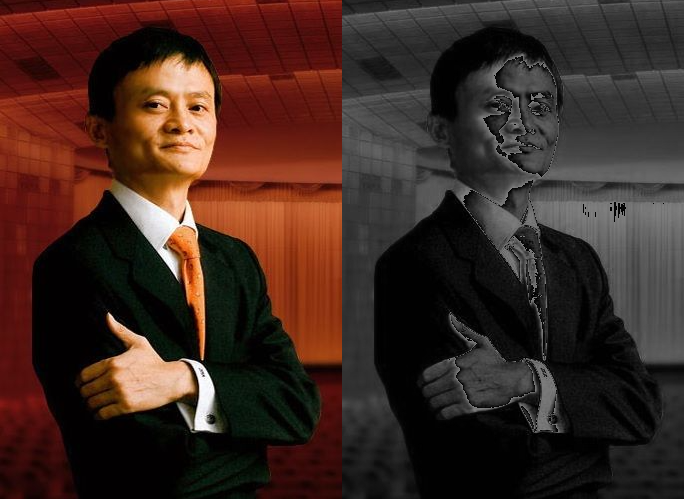

In [13]:
print('Mengubah citra menjadi grayscale menggunakan metode lightness')
print('-------------------------------------------------------------')

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/Bahan PCVK/man.png')

# Membuat citra grayscale dengan metode lightness
# Formula: grayscale_value = (max(R, G, B) + min(R, G, B)) / 2
lightness_image = np.zeros((original.shape[0], original.shape[1]), dtype=np.uint8)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        # Mengambil nilai RGB untuk setiap piksel
        R = original[y, x, 2]  # Komponen Red
        G = original[y, x, 1]  # Komponen Green
        B = original[y, x, 0]  # Komponen Blue

        # Menghitung lightness
        max_rgb = max(R, G, B)
        min_rgb = min(R, G, B)
        lightness_image[y, x] = (max_rgb + min_rgb) // 2  # Menggunakan pembagian bulat

# Menampilkan citra asli dan citra grayscale berdampingan
final_frame = cv.hconcat((original, cv.cvtColor(lightness_image, cv.COLOR_GRAY2BGR)))
cv2_imshow(final_frame)


Mengubah citra menjadi grayscale menggunakan metode luminance
-------------------------------------------------------------


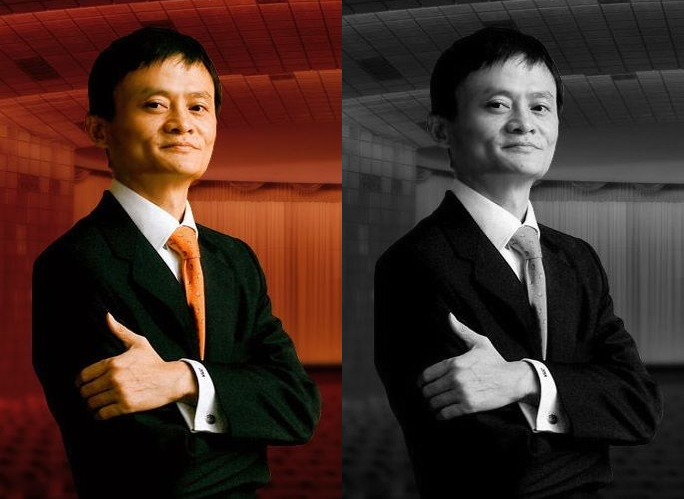

In [17]:
print('Mengubah citra menjadi grayscale menggunakan metode luminance')
print('-------------------------------------------------------------')

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/Bahan PCVK/man.png')

# Membuat citra grayscale dengan metode luminance
# Rumus: Luminance = 0.299*R + 0.587*G + 0.114*B
luminance_image = np.zeros((original.shape[0], original.shape[1]), dtype=np.uint8)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        R = original[y, x, 2]  # Komponen Red
        G = original[y, x, 1]  # Komponen Green
        B = original[y, x, 0]  # Komponen Blue

        # Menghitung luminance
        luminance_image[y, x] = int(0.299 * R + 0.587 * G + 0.114 * B)

# Menampilkan citra asli dan citra grayscale berdampingan
# Mengonversi citra dari BGR ke RGB untuk ditampilkan di OpenCV
final_frame = cv.hconcat((original, cv.cvtColor(luminance_image, cv.COLOR_GRAY2BGR)))
cv2_imshow(final_frame)


Mengubah warna tertentu pada citra menjadi grayscale
----------------------------------------------------


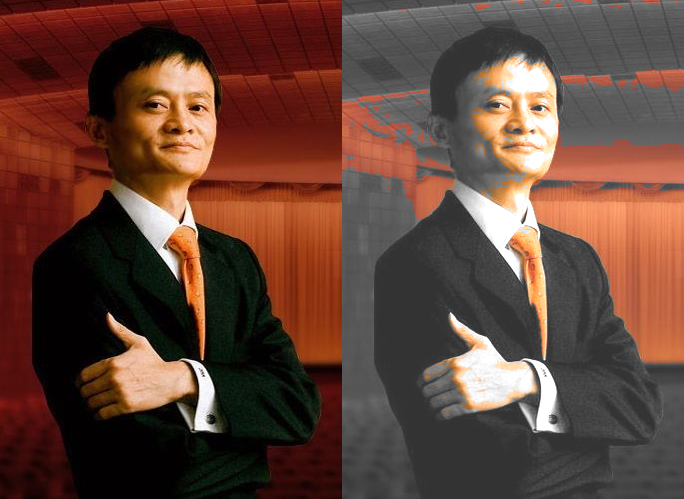

In [18]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah warna tertentu pada citra menjadi grayscale')
print('----------------------------------------------------')

# Mengatur nilai kecerahan
brightness = 50  # Misalnya kita set kecerahan menjadi 50

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/Bahan PCVK/man.png')

# Mengubah citra ke ruang warna HSV
hsv_image = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Rentang warna oranye dalam ruang HSV
lower_orange = np.array([5, 100, 100])  # Batas bawah warna oranye
upper_orange = np.array([15, 255, 255])  # Batas atas warna oranye

# Membuat mask untuk warna oranye
mask = cv.inRange(hsv_image, lower_orange, upper_orange)

# Membuat citra grayscale
gray_image = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Mengubah citra grayscale menjadi BGR
gray_bgr = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)

# Menggunakan mask untuk mengganti warna
result_image = np.where(mask[..., np.newaxis] == 255, original, gray_bgr)

# Mengubah kecerahan citra
brightness_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(result_image[y, x, c] + brightness, 0, 255)

# Menampilkan citra asli dan citra hasil
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)
